In [45]:
# import library
import pandas as pd
pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import numpy as np

from scipy import stats
plt.style.use('fivethirtyeight')
# pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings('ignore')

# Data Overview

In [46]:
# load dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset/homecredit/application_train.csv")

In [47]:
# check data sample
df.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
222510,357743,0,Cash loans,F,N,N,0,157500.0,2517300.0,66532.5,...,0,0,1,0,0.0,0.0,0.0,2.0,0.0,1.0
23103,126885,0,Cash loans,F,N,Y,0,171000.0,670500.0,31198.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
212542,346301,0,Cash loans,F,N,N,0,99000.0,91143.0,8433.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
237366,374944,0,Cash loans,M,N,Y,0,180000.0,281493.0,20146.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
91672,206459,0,Cash loans,M,N,Y,0,148500.0,450000.0,24543.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
173346,300879,0,Cash loans,F,Y,Y,2,315000.0,383746.5,41458.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
32271,137414,0,Cash loans,F,Y,Y,0,157500.0,521280.0,26649.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
196307,327615,0,Cash loans,M,Y,Y,0,225000.0,157500.0,17091.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
70381,181647,0,Cash loans,M,Y,N,0,225000.0,643500.0,24934.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
59821,169345,0,Cash loans,F,Y,N,0,90000.0,481320.0,12825.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# check datatypes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [49]:
df.drop(columns='SK_ID_CURR').describe(include=(['int64', 'float64'])).T

,count,mean,std,min,25%,50%,75%,max
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00


In [50]:
df.describe(include='object').T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


## check missing values data

In [51]:
data = pd.DataFrame({'dataFeatures' : df.columns, 'dataType' : df.dtypes.values,
              'null' : [df[i].isna().sum() for i in df.columns],
              'nullPct' : [((df[i].isna().sum()/len(df[i]))*100).round(1) for i in df.columns],
              'Nunique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample(1)) for i in df.columns]}).reset_index(drop = True)


data.sort_values(by = "null", ascending = False)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
76,COMMONAREA_MEDI,float64,214865,69.9,3202,[0.1943]
48,COMMONAREA_AVG,float64,214865,69.9,3181,[0.0424]
62,COMMONAREA_MODE,float64,214865,69.9,3128,[0.0601]
70,NONLIVINGAPARTMENTS_MODE,float64,213514,69.4,167,[0.179]
56,NONLIVINGAPARTMENTS_AVG,float64,213514,69.4,386,[0.002]
84,NONLIVINGAPARTMENTS_MEDI,float64,213514,69.4,214,[0.6871]
86,FONDKAPREMONT_MODE,object,210295,68.4,4,[not specified]
68,LIVINGAPARTMENTS_MODE,float64,210199,68.4,736,[0.1313]
54,LIVINGAPARTMENTS_AVG,float64,210199,68.4,1868,[0.1582]
82,LIVINGAPARTMENTS_MEDI,float64,210199,68.4,1097,[0.5259]


# EDA

In [52]:
# Find correlations with the target and sort
correlations = df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


#### Data is imbalance or balance?

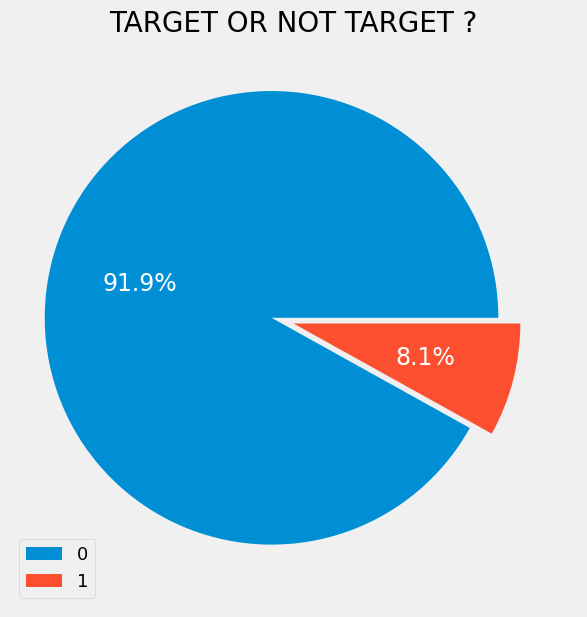

In [53]:
plt.figure(figsize = (8,7))
plt.title('TARGET OR NOT TARGET ?', fontsize = 20)

labels = '0', '1'

plt.pie(df['TARGET'].value_counts(), autopct = '%.1f%%',
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower left', fontsize = 13)

plt.show()

#### Distribution of amount income total

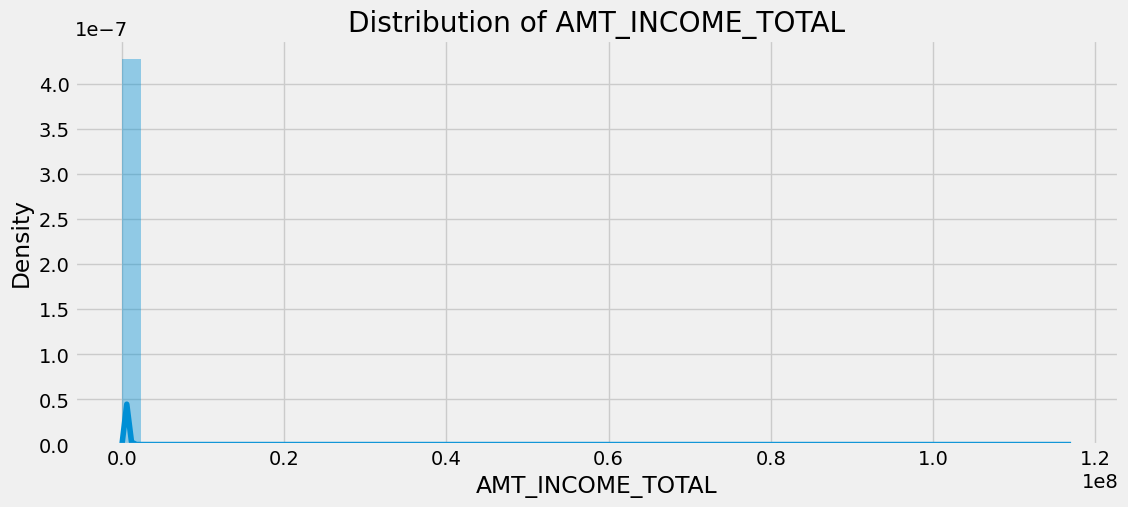

In [54]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(df["AMT_INCOME_TOTAL"].dropna())

#### Distribution of amount credit

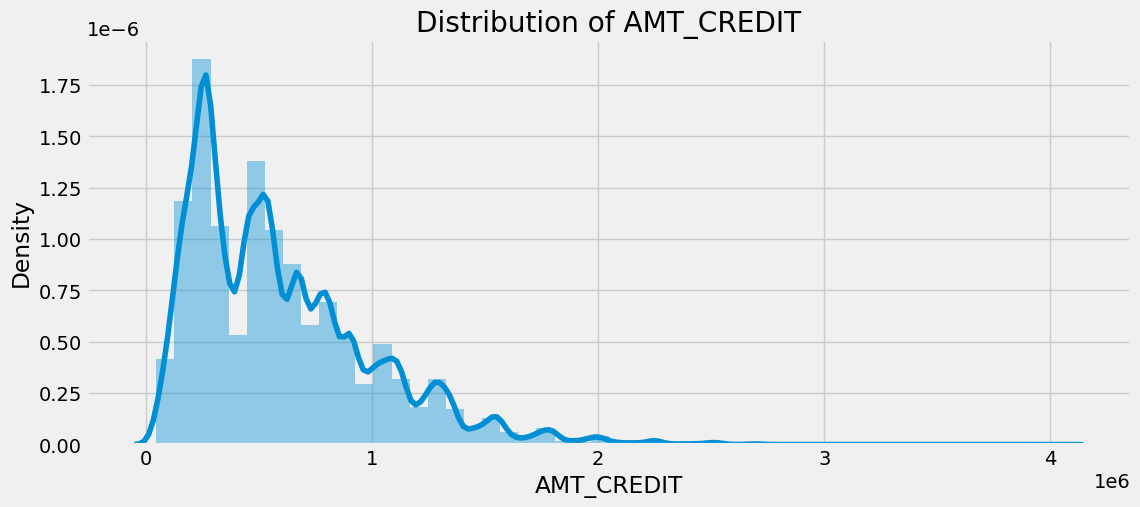

In [55]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(df["AMT_CREDIT"])

#### Distribution of amount credit

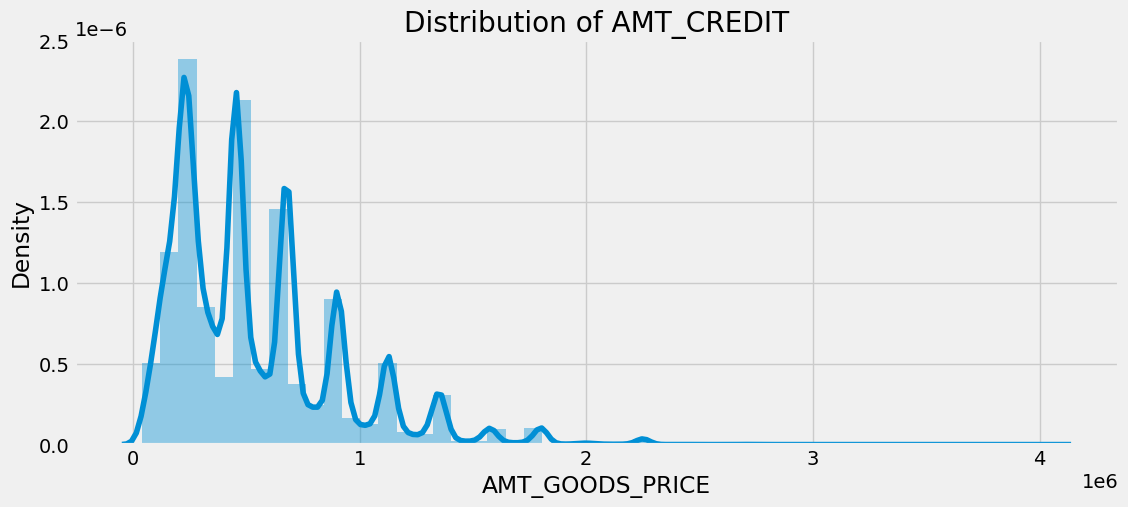

In [56]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(df["AMT_GOODS_PRICE"])

In [57]:
# temp = df["NAME_INCOME_TYPE"].value_counts()
# df = pd.DataFrame({'labels': temp.index,
#                   'values': temp.values
#                  })
# df.iplot(kind='pie',labels='labels',values='values', title='Income sources of Applicant\'s', hole = 0.5)

#### job type of applicant's who applied for a loan

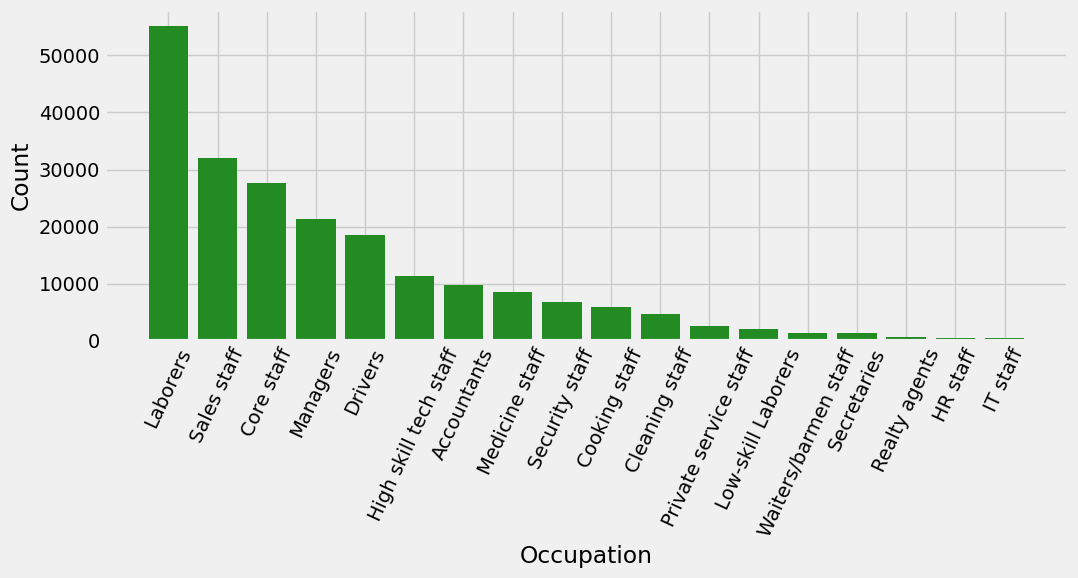

In [58]:
ta = df["OCCUPATION_TYPE"].value_counts()

plt.figure(figsize=(11,6))
plt.bar(ta.index, ta, color="forestgreen")
plt.ylabel("Count")
plt.xlabel("Occupation")
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

- Top 3 Applicant's who applied for loan
  1. Laborers approximately 55k
  2. Sales staff approximately 32k
  3. Core staff approximately 28k

#### Types of loan

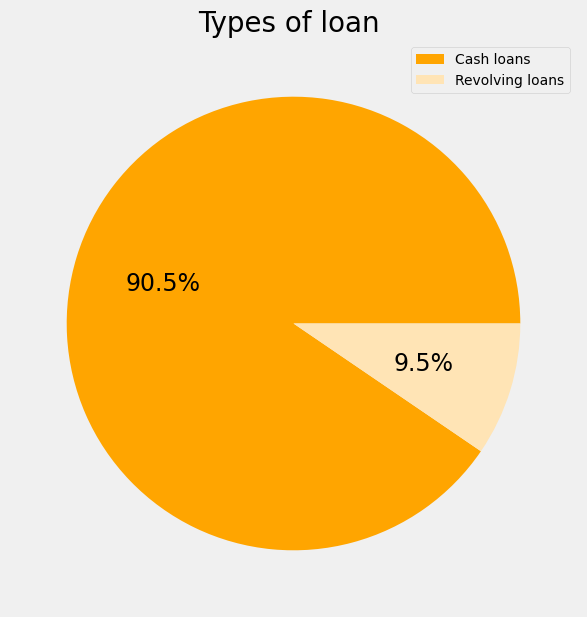

In [59]:
plt.figure(figsize = (8,7))
plt.title('Types of loan ', fontsize = 20)

labels = 'Cash loans', 'Revolving loans'
plt.pie(df['NAME_CONTRACT_TYPE'].value_counts(), autopct = '%.1f%%',
        textprops = {'fontsize' : 17}, colors=["orange", "moccasin"])

plt.legend(labels, loc='upper right', fontsize = 10)
plt.show()

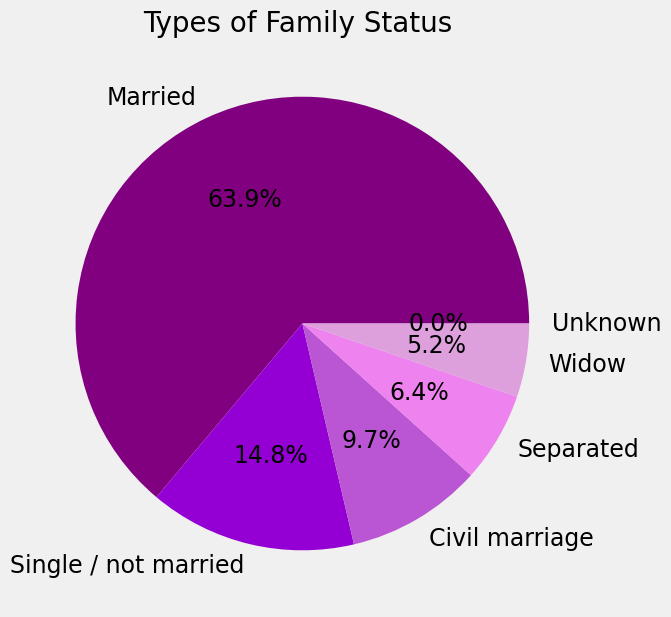

In [60]:
plt.figure(figsize = (8,7))
plt.title('Types of Family Status ', fontsize = 20)

tu = df['NAME_FAMILY_STATUS'].value_counts()
labels = tu.index
plt.pie(tu, autopct = '%.1f%%',
        textprops = {'fontsize' : 17}, colors=["purple", "darkviolet", "mediumorchid", "violet", "plum", "thistle"],
        labels=labels)

plt.show()

63.9 % applicants are married. 14.8 % are single etc

#### Distribution afe of client

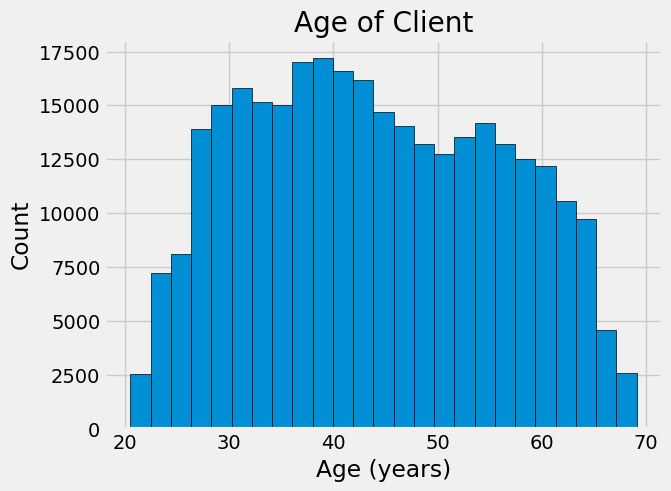

In [61]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(df['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

#### Type of education

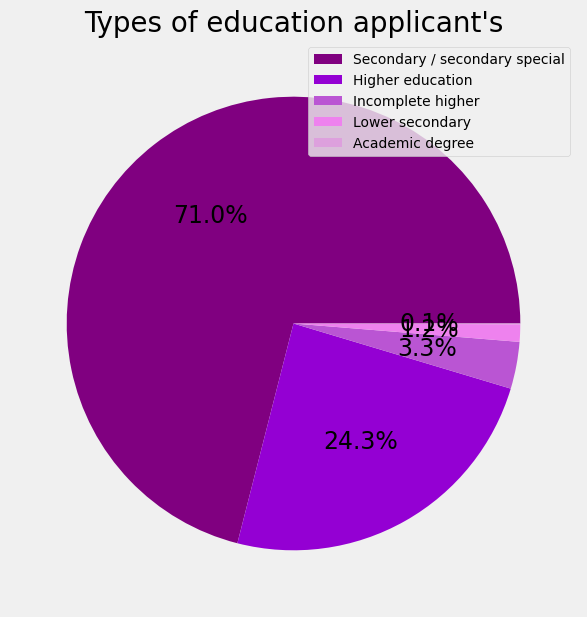

In [62]:
plt.figure(figsize = (8,7))
plt.title("Types of education applicant's", fontsize = 20)

labels = 'Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree'
plt.pie(df['NAME_EDUCATION_TYPE'].value_counts(), autopct = '%.1f%%',
        textprops = {'fontsize' : 17}, colors=["purple", "darkviolet", "mediumorchid", "violet", "plum"])

plt.legend(labels, loc='upper right', fontsize = 10)
plt.show()

#### Exterior Sources

The 3 variables with the strongest negative correlations with the target are ***EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3***. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

Let's take a look at these variables.

First, we can show the correlations of the EXT_SOURCE features with the target and with each other.

In [63]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


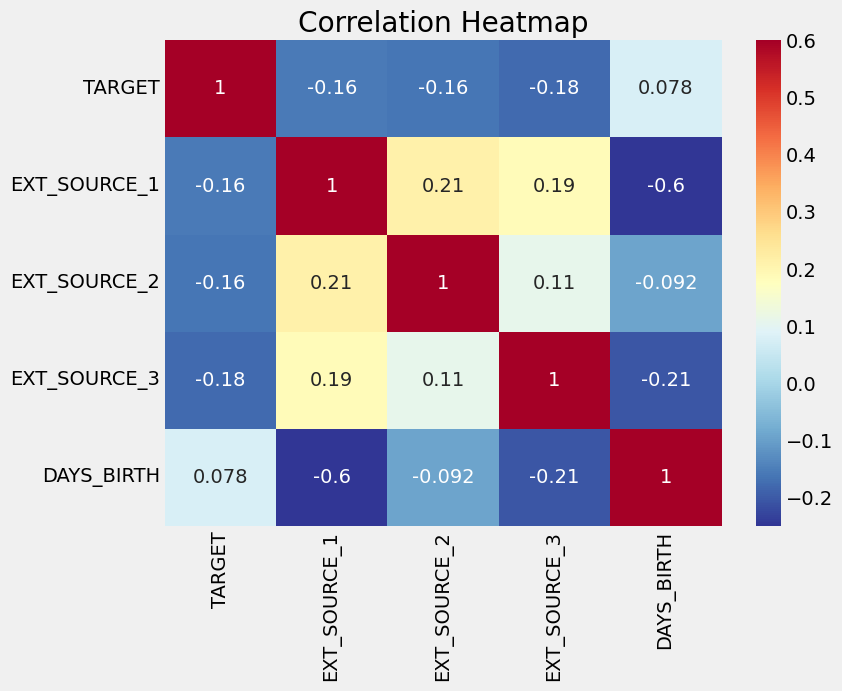

In [64]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

All three ***EXT_SOURCE*** featureshave negative correlations with the target, indicating that as the value of the ***EXT_SOURCE*** increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with ***EXT_SOURCE_1*** indicating that maybe one of the factors in this score is the client age.

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.

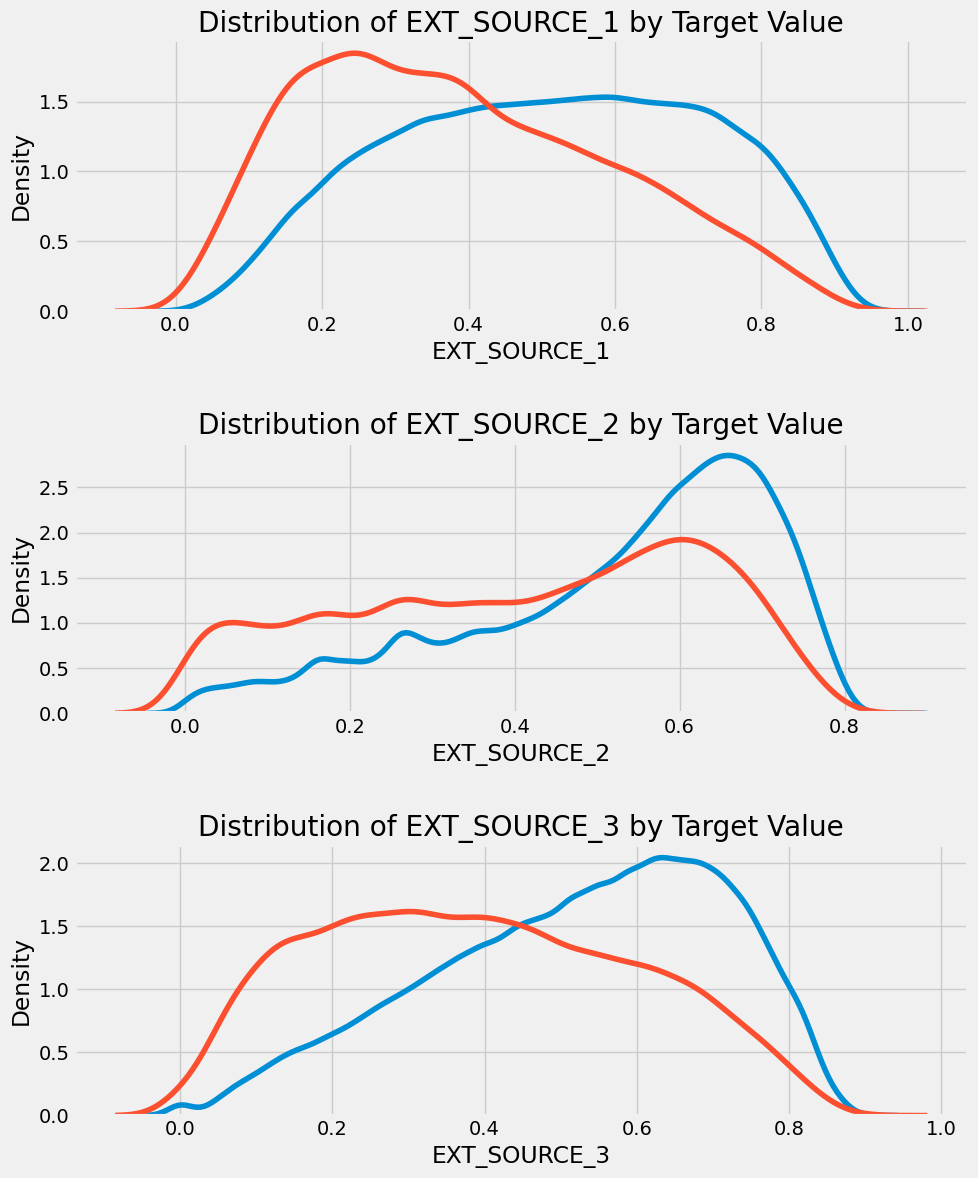

In [65]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df.loc[df['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['TARGET'] == 1, source], label = 'target == 1')

    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

***EXT_SOURCE_3*** displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong in fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

# Data Cleaning

In [66]:
# copy data before we drop some feature
df1 = df.copy()

#### Missing Values Handiling

In [67]:
data.sort_values(by = "null", ascending = False)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
76,COMMONAREA_MEDI,float64,214865,69.9,3202,[0.1943]
48,COMMONAREA_AVG,float64,214865,69.9,3181,[0.0424]
62,COMMONAREA_MODE,float64,214865,69.9,3128,[0.0601]
70,NONLIVINGAPARTMENTS_MODE,float64,213514,69.4,167,[0.179]
56,NONLIVINGAPARTMENTS_AVG,float64,213514,69.4,386,[0.002]
84,NONLIVINGAPARTMENTS_MEDI,float64,213514,69.4,214,[0.6871]
86,FONDKAPREMONT_MODE,object,210295,68.4,4,[not specified]
68,LIVINGAPARTMENTS_MODE,float64,210199,68.4,736,[0.1313]
54,LIVINGAPARTMENTS_AVG,float64,210199,68.4,1868,[0.1582]
82,LIVINGAPARTMENTS_MEDI,float64,210199,68.4,1097,[0.5259]


There are many null features, we will remove features that have more than 20% null data.

In [68]:
df1 = df1.drop(["COMMONAREA_MEDI", "COMMONAREA_AVG", "COMMONAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAPARTMENTS_AVG",
"NONLIVINGAPARTMENTS_MEDI", "FONDKAPREMONT_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAPARTMENTS_AVG", "LIVINGAPARTMENTS_MEDI",
"FLOORSMIN_AVG", "FLOORSMIN_MODE", "FLOORSMIN_MEDI", "YEARS_BUILD_MEDI", "YEARS_BUILD_MODE", "YEARS_BUILD_AVG", "OWN_CAR_AGE",
"LANDAREA_MEDI", "LANDAREA_MODE", "LANDAREA_AVG", "BASEMENTAREA_MEDI", "BASEMENTAREA_MODE", "BASEMENTAREA_AVG",
"NONLIVINGAREA_MODE", "NONLIVINGAREA_MEDI", "NONLIVINGAREA_AVG", "ELEVATORS_MEDI", "ELEVATORS_MODE", "ELEVATORS_AVG",
"APARTMENTS_MEDI", "APARTMENTS_MODE", "APARTMENTS_AVG", "ENTRANCES_MEDI", "ENTRANCES_MODE", "ENTRANCES_AVG",
"LIVINGAREA_AVG", "LIVINGAREA_MODE", "LIVINGAREA_MEDI", "HOUSETYPE_MODE", "FLOORSMAX_MODE",
"FLOORSMAX_MEDI", "FLOORSMAX_AVG", "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BEGINEXPLUATATION_MEDI",
"YEARS_BEGINEXPLUATATION_AVG", "TOTALAREA_MODE", "EMERGENCYSTATE_MODE", "OCCUPATION_TYPE", "WALLSMATERIAL_MODE"], axis=1)

In [69]:
# Shape of training data (num_rows, num_columns)
print(df1.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (df1.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(307511, 73)
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
CNT_FAM_MEMBERS                    2
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
DAYS_LAST_PHONE_CHANGE             1
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
dtype: int64


drop a couple of rows of data because there are only a few of them and it will not affect the model that will be built.

some of the rows of the feature that we will drop are : **OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, AMT_ANNUITY, AMT_GOODS_PRICE**

In [70]:
# drop null with filter + notna
df1 = df1[df1["OBS_30_CNT_SOCIAL_CIRCLE"].notna()].reset_index(drop=True) # use reset index
df1 = df1[df1["DEF_30_CNT_SOCIAL_CIRCLE"].notna()].reset_index(drop=True)
df1 = df1[df1["OBS_60_CNT_SOCIAL_CIRCLE"].notna()].reset_index(drop=True)
df1 = df1[df1["DEF_60_CNT_SOCIAL_CIRCLE"].notna()].reset_index(drop=True)
df1 = df1[df1["AMT_ANNUITY"].notna()].reset_index(drop=True)
df1 = df1[df1["AMT_GOODS_PRICE"].notna()].reset_index(drop=True)

for **CNT_FAM_MEMBERS, DAYS_LAST_PHONE_CHANGE** use a combination of bfill() and ffill() to handle it

In [71]:
df1['CNT_FAM_MEMBERS'] = df1['CNT_FAM_MEMBERS'].ffill().bfill()
df1['DAYS_LAST_PHONE_CHANGE'] = df1['DAYS_LAST_PHONE_CHANGE'].ffill().bfill()

on **NAME_TYPE_SUITE** teks yang dimiringkan will use the most data

In [72]:
df1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      247626
Family              40057
Spouse, partner     11343
Children             3261
Other_B              1765
Other_A               865
Group of people       269
Name: NAME_TYPE_SUITE, dtype: int64

In [73]:
df1['NAME_TYPE_SUITE'] = df1['NAME_TYPE_SUITE'].fillna('Unaccompanied')

do checking on the feature **AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR**

In [74]:
test = df1[["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]]

In [75]:
for a in test.columns:
  coun_val = test[a].value_counts()
  print(f'values counts in column {a}: \n{coun_val}')

values counts in column AMT_REQ_CREDIT_BUREAU_HOUR: 
0.0    263282
1.0      1550
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
values counts in column AMT_REQ_CREDIT_BUREAU_DAY: 
0.0    263410
1.0      1291
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
values counts in column AMT_REQ_CREDIT_BUREAU_WEEK: 
0.0    256383
1.0      8188
2.0       199
3.0        57
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
values counts in column AMT_REQ_CREDIT_BUREAU_MON: 
0.0     221268
1.0      33057
2.0       5370
3.0       1985
4.0       1073
5.0        598
6.0        339
7.0        296
9.0        206
8.0        184
10.0       131
11.0       118
12.0        77
13.0        71
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         

we will drop the column above
column because it has quite a lot of missing values and many of the contents are 80% the same

In [76]:
df1 = df1.drop(["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"], axis=1)

In [77]:
print(df.shape)
print(df1.shape)

(307511, 122)
(306200, 67)


In [78]:
# Number of missing values in each column of training data
missing_val_count_by_column = (df1.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

EXT_SOURCE_1    172679
EXT_SOURCE_2       655
EXT_SOURCE_3     60624
dtype: int64


for external data source we will fill it using median

In [79]:
# Make a new dataframe for polynomial features
poly_features = df1[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)

poly_features = pd.DataFrame(poly_features) # Convert to dataframe
poly_features = poly_features.rename(columns={0:'EXT_SOURCE_1', 1:'EXT_SOURCE_2', 2:'EXT_SOURCE_3'})

In [81]:
poly_features.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
1,0.311267,0.622246,0.535276
2,0.505859,0.555912,0.729567
3,0.505859,0.650442,0.535276
4,0.505859,0.322738,0.535276


In [82]:
df1 = df1.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)

In [83]:
# Gabungkan kedua DataFrame berdasarkan indeks
df_new = pd.concat([df1, poly_features], axis=1)

In [84]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306200 entries, 0 to 306199
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   306200 non-null  int64  
 1   TARGET                       306200 non-null  int64  
 2   NAME_CONTRACT_TYPE           306200 non-null  object 
 3   CODE_GENDER                  306200 non-null  object 
 4   FLAG_OWN_CAR                 306200 non-null  object 
 5   FLAG_OWN_REALTY              306200 non-null  object 
 6   CNT_CHILDREN                 306200 non-null  int64  
 7   AMT_INCOME_TOTAL             306200 non-null  float64
 8   AMT_CREDIT                   306200 non-null  float64
 9   AMT_ANNUITY                  306200 non-null  float64
 10  AMT_GOODS_PRICE              306200 non-null  float64
 11  NAME_TYPE_SUITE              306200 non-null  object 
 12  NAME_INCOME_TYPE             306200 non-null  object 
 13 

# Modeling

In [ ]:
# Import Module
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve, precision_score, f1_score, auc
from imblearn.over_sampling import SMOTE

In [170]:
X = df_new.drop(['SK_ID_CURR','TARGET'],axis=1)
y = df_new['TARGET']

In [171]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306200 entries, 0 to 306199
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           306200 non-null  object 
 1   CODE_GENDER                  306200 non-null  object 
 2   FLAG_OWN_CAR                 306200 non-null  object 
 3   FLAG_OWN_REALTY              306200 non-null  object 
 4   CNT_CHILDREN                 306200 non-null  int64  
 5   AMT_INCOME_TOTAL             306200 non-null  float64
 6   AMT_CREDIT                   306200 non-null  float64
 7   AMT_ANNUITY                  306200 non-null  float64
 8   AMT_GOODS_PRICE              306200 non-null  float64
 9   NAME_TYPE_SUITE              306200 non-null  object 
 10  NAME_INCOME_TYPE             306200 non-null  object 
 11  NAME_EDUCATION_TYPE          306200 non-null  object 
 12  NAME_FAMILY_STATUS           306200 non-null  object 
 13 

In [172]:
X = X.select_dtypes(exclude='object')

In [173]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print("Training Set - X_train shape:", X_train.shape)
print("Testing Set - X_test shape:", X_test.shape)
print("Training Set - y_train shape:", y_train.shape)
print("Testing Set - y_test shape:", y_test.shape)

Training Set - X_train shape: (214340, 54)
Testing Set - X_test shape: (91860, 54)
Training Set - y_train shape: (214340,)
Testing Set - y_test shape: (91860,)


Based on the analysis that has been done above, it is found that the data has an imbalance, so in the next process, oversampling will be carried out so that the machine can learn with more data.

In [179]:
# check before oversampling
print('X_train sebelum Oversampling', X_train.shape)
print('y_train sebelum Oversampling', y_train.shape, '\n')

print("Label '1' sebelum Oversampling", sum(y_train == 1))
print("Label '0' sebelum Oversampling", sum(y_train == 0))

X_train sebelum Oversampling (214340, 54)
y_train sebelum Oversampling (214340,) 

Label '1' sebelum Oversampling 17356
Label '0' sebelum Oversampling 196984


In [180]:
# use smote for oversampling
sm = SMOTE(random_state = 0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [181]:
# cek after oversampling
print('X_train sesudah Oversampling', X_train_sm.shape)
print('y_train sesudah Oversampling', y_train_sm.shape, '\n')

print("Label '1' sesudah Oversampling", sum(y_train_sm == 1))
print("Label '0' sesudah Oversampling", sum(y_train_sm == 0))

X_train sesudah Oversampling (393968, 54)
y_train sesudah Oversampling (393968,) 

Label '1' sesudah Oversampling 196984
Label '0' sesudah Oversampling 196984


#### Random Forest

In [193]:
rfr=RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2018)
rfr.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=8, max_features=0.5, min_samples_leaf=4,
                       n_estimators=50, random_state=2018)

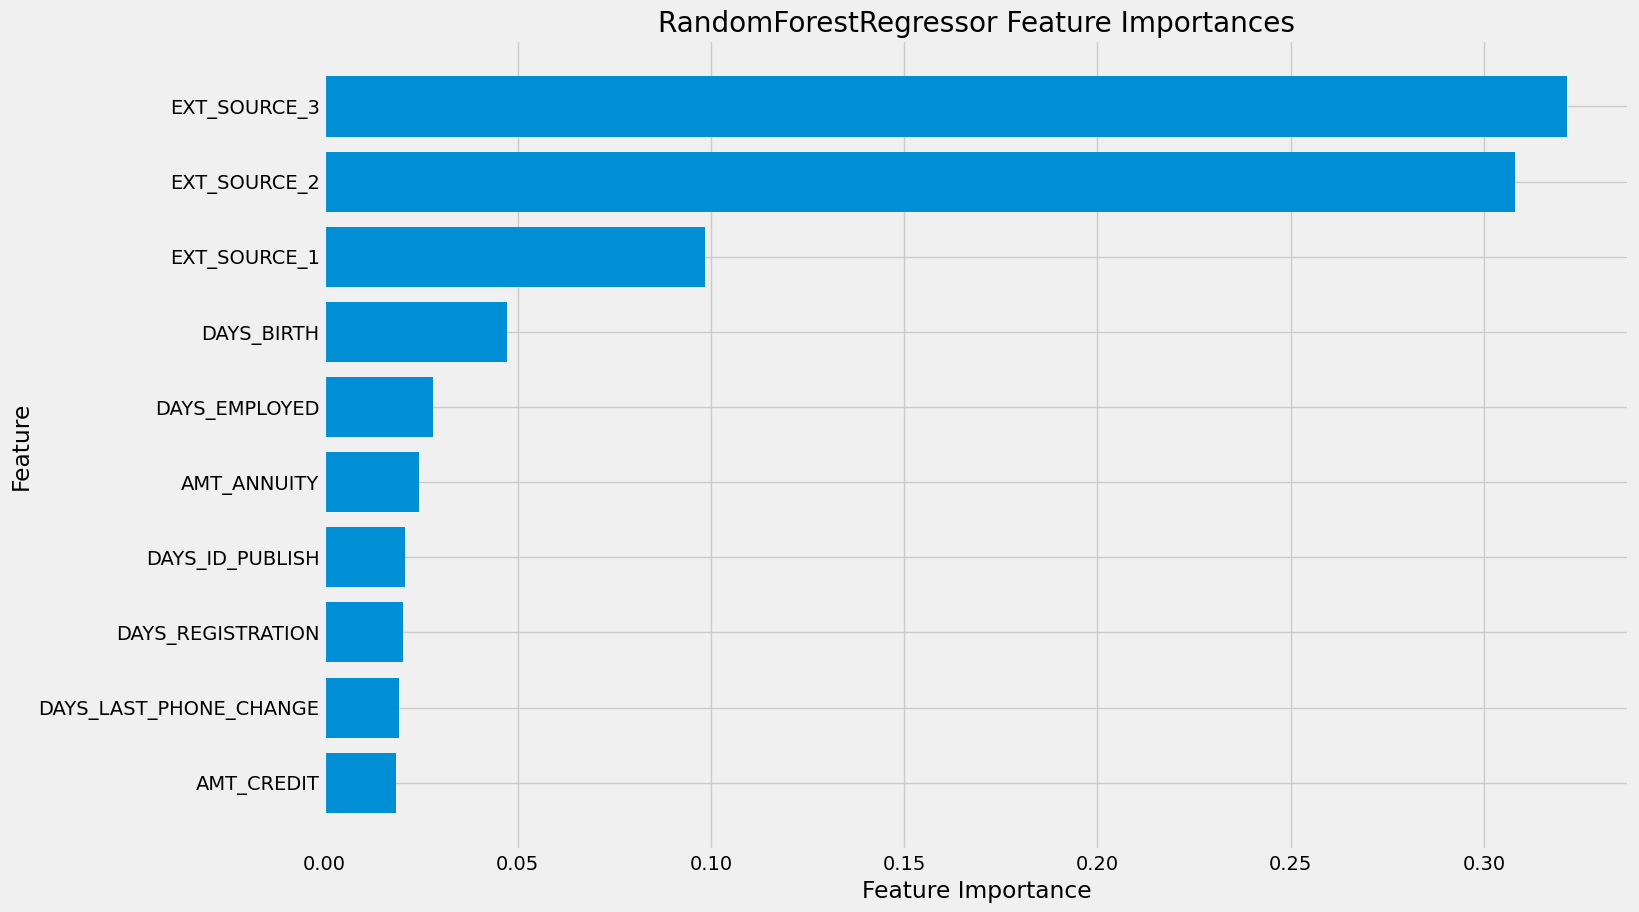

In [177]:
feature_importances = rfr.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[-10:]

plt.figure(figsize=(15, 10))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices])
plt.yticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('RandomForestRegressor Feature Importances')
plt.show()

In [98]:
X = X[['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH']]

In [195]:
y_pred_rf = rfr.predict(X_test)

In [127]:
# make a function to plot the roc auc curve
def plot_roc_curve(true_y, y_prob, labels):

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)

    sns.lineplot(fpr, tpr, label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


model AUC score (oversampling) : 0.5494383563660783



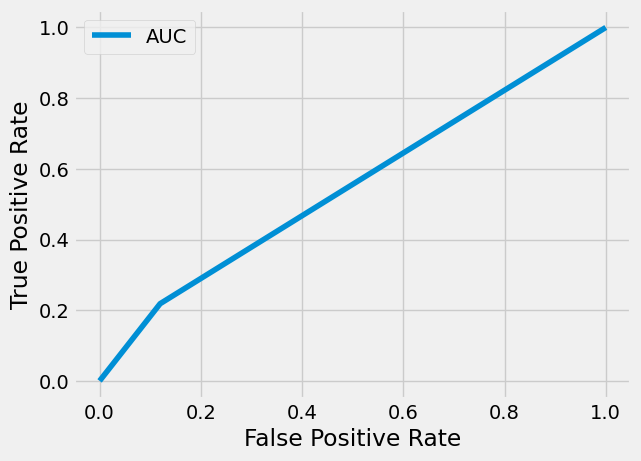

In [203]:
plot_roc_curve(y_test, y_pred_rf, "AUC")
print(f"\nmodel AUC score (oversampling) : {roc_auc_score(y_test, y_pred_rf)}\n")
plt.show()

In [197]:
# classification report random forest
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     84448
           1       0.14      0.22      0.17      7412

    accuracy                           0.83     91860
   macro avg       0.53      0.55      0.54     91860
weighted avg       0.86      0.83      0.84     91860



#### Logistic Regression

In [202]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve, precision_score, f1_score, auc
from imblearn.over_sampling import SMOTE

In [182]:
# fitting model dengan data oversampling
model_sm = LogisticRegression(solver='saga', C = 0.0001, max_iter=100)
model_sm.fit(X_train_sm, y_train_sm)

# buat prediksi dengan model oversampling
y_pred_sm = model_sm.predict(X_test)

In [187]:
# Membuat objek model Logistic Regression
model = LogisticRegression()

# Menentukan ruang parameter untuk dijelajahi
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'sag']
}

# Membuat scorer khusus untuk Grid Search berdasarkan recall dan f1 score
scorer = {'recall': make_scorer(recall_score, average='weighted'),
          'f1_score': make_scorer(f1_score, average='weighted')}

# Melakukan Grid Search untuk tuning hyperparameter
grid_search = GridSearchCV(model, param_grid, scoring=scorer, refit='f1_score', cv=5)
grid_search.fit(X_train_sm, y_train_sm)

# Menampilkan hasil tuning
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score on Validation Set:", grid_search.best_score_)
print("Recall Score on Validation Set:", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])

# Melakukan prediksi pada data uji menggunakan model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mengukur performa model di data uji
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Menampilkan hasil akhir
print(f'Accuracy on Test Set: {accuracy}')
print('\nClassification Report on Test Set:\n', report)


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score on Validation Set: 0.7915974706202549
Recall Score on Validation Set: 0.7922954217697011
Accuracy on Test Set: 0.7524929240148052

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85     84448
           1       0.13      0.38      0.20      7412

    accuracy                           0.75     91860
   macro avg       0.53      0.58      0.53     91860
weighted avg       0.87      0.75      0.80     91860




model AUC score (oversampling) : 0.5806511923814133



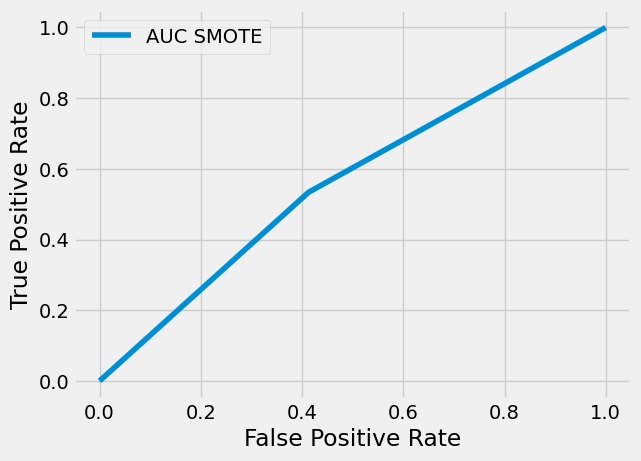

In [188]:
plot_roc_curve(y_test, y_pred_sm, "AUC SMOTE")
print(f"\nmodel AUC score (oversampling) : {roc_auc_score(y_test, y_pred)}\n")
plt.show()

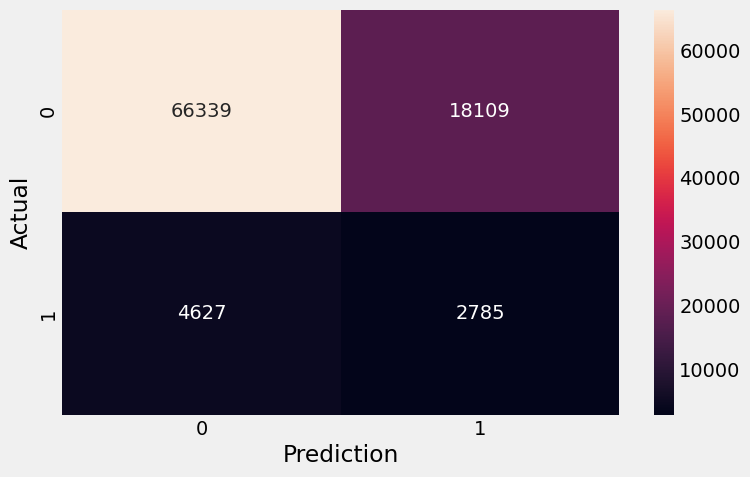

In [189]:
# Confusion Matrix Logistic Refression
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()